### Handling Missing Values

#### Technique to handle missing values


1. Delete the record missing values : applicable only for big dataset
2. Create a seperate models to handle the missing vlaues: time taking
3. Imputation:mean, median and mode: mostly applicable for any datasets 


#### Import Required Libraries

In [1]:
from pandas import*
from numpy import*
from seaborn import*
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

####  Importing and Exploring the Data

In [18]:
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (8, 4);

In [3]:
data = read_csv('flights.csv')
data.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [4]:
data.shape

(160754, 16)

We have 16 columns in total, 15 of them are feature columns and minute is the target column

In [33]:
data.isnull().sum()

year            0
month           0
day             0
dep_time     2336
dep_delay    2336
arr_time     2479
arr_delay    2827
carrier         0
tailnum      1433
flight          0
origin          0
dest            0
air_time     2827
distance        0
hour         2336
minute       2336
dtype: int64

#### Missing Values Indicator

In [6]:
from sklearn.impute import MissingIndicator

In [9]:
feature_cols = [col for col in data.columns if col not in ['minute']]
target_cols = ['minute']

cat_cols = [col for col in feature_cols if data[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]

In [10]:
df_miss = data.copy()
miss_indi = MissingIndicator()
miss_rc = miss_indi.fit_transform(df_miss[feature_cols])
miss_rc.shape

(160754, 7)

**Rows with Missing Values**

In [11]:
sum(data.isna().sum(axis = 1) > 0)

2827

 **Columns with Missing Values**

In [12]:
sum(data.isna().sum(axis = 0) > 0)

8

#### Heatmap for missing data

<AxesSubplot:>

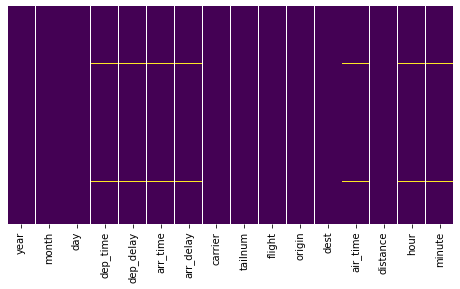

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar = False, cmap = 'viridis')

 #### Univariate Imputation Using  Simple Imputer

**Imputing Continuous Variables**

In [26]:
df_simple_imputer = data.copy()
imputer = SimpleImputer(strategy='mean')

df_simple_imputer[cont_cols] = imputer.fit_transform(df_simple_imputer[cont_cols])

**Imputing Categorical Variables**

In [31]:
imputer = SimpleImputer(strategy='most_frequent')

df_simple_imputer[cat_cols] = imputer.fit_transform(df_simple_imputer[cat_cols])

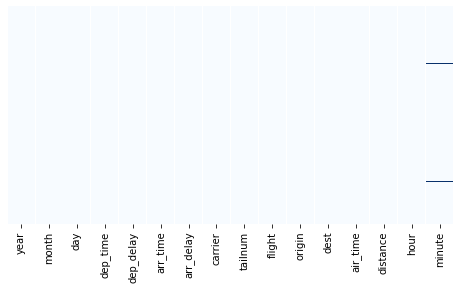

In [32]:
sns.heatmap(df_simple_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=data.columns);

**Done**